


# Vamos encher o carrinho!

# Introdu√ß√£o

O Instacart √© uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus c√°lculos sejam executados mais rapidamente e inclu√≠mos valores ausentes e duplicados. Tamb√©m tivemos o cuidado de preservar as distribui√ß√µes dos dados originais quando fizemos as altera√ß√µes.

Voc√™ precisa completar tr√™s etapas. Para cada uma delas, escreva uma breve introdu√ß√£o descrevendo como voc√™ pretende concluir a etapa e justifique suas decis√µes em par√°grafos explicativos a medida que voc√™ avan√ßa na solu√ß√£o. Escreva tamb√©m uma conclus√£o para resumir suas conclus√µes e escolhas.



## Dicion√°rio de dados

H√° cinco tabelas no conjunto de dados, e voc√™ vai precisar usar todas elas para pr√©-processar seus dados e fazer AED. Abaixo est√° um dicion√°rio que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: √© o n√∫mero que identifica cada pedido de forma exclusiva
    - `'user_id'`: √© o n√∫mero de identifica√ß√£o exclusivo da conta de cada cliente
    - `'order_number'`: √© o n√∫mero de vezes que o cliente fez um pedido
    - `'order_dow'`: √© o dia da semana em que o pedido foi feito (0 √© domingo)
    - `'order_hour_of_day'`: √© a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: √© o n√∫mero de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: √© o n√∫mero de identifica√ß√£o un√≠voco de cada produto
    - `'product_name'`: √© o nome do produto
    - `'aisle_id'`: √© o n√∫mero de identifica√ß√£o exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: √© o n√∫mero de identifica√ß√£o exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item inclu√≠do em um pedido
    -	`'order_id'`: √© o n√∫mero que identifica cada pedido de forma exclusiva
    -	`'product_id'`: √© o n√∫mero de identifica√ß√£o exclusivo de cada produto
    -	`'add_to_cart_order'`: √© a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se j√° o comprou




-	`aisles.csv`
    -	`'aisle_id'`: √© o n√∫mero de identifica√ß√£o exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: √© o nome do corredor



-	`departments.csv`
    -	`'department_id'`: √© o n√∫mero de identifica√ß√£o exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: √© o nome do departamento


# Etapa 1. Vis√£o geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os par√¢metros apropriados para fazer isso corretamente. Verifique as informa√ß√µes para cada DataFrame criado.


## Plano de solu√ß√£o

Escreva aqui seu plano para a Etapa 2. Vis√£o geral dos dados

In [56]:
# Importe as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [57]:
# leia os conjuntos de dados em DataFrames
df_products = pd.read_csv('products (1).csv', sep=';')
df_inscart_orders = pd.read_csv('instacart_orders.csv', sep=';')


df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_orders_products = pd.read_csv('order_products.csv.zip', compression='zip', sep=';')

In [58]:
# imprima as informa√ß√µes sobre o DataFrame

df_products.info()
#valores nulos 1258 e nnenhum duplicado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [59]:
# imprima as informa√ß√µes sobre o DataFrame

df_inscart_orders.head()


#valores nulos 28819 e 15 duplicados, obs: valor de order_hour e int***

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0

In [60]:
# imprima as informa√ß√µes sobre o DataFrame

df_aisles.info()

#nao tem valores nulos e nem duplicados, dtypes ok!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [61]:
# imprima as informa√ß√µes sobre o DataFrame
df_orders_products.info()
df_orders_products.head()

#valores nulos 836,  duplicados 0, dtypes ok!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

In [62]:
# imprima as informa√ß√µes sobre o DataFrame

df_departments.dtypes
#nao tem valores nulos e tambem nao tem duplicados, dtypes ok!

department_id     int64
department       object
dtype: object

## Conclus√µes

Escreva aqui suas conclus√µes intermedi√°rias da Etapa 1. Vis√£o geral dos dados

Tem alguns dataframes com valores nulos a serem tratados, tambem com duplicados. os dtypes ate entao estao ok, preciso verifica se order hour que e int vai me atrapalhar XD 

# Etapa 2. Prepara√ß√£o de dados

Fa√ßa o pr√©-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam n√∫meros inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados voc√™ encontrou, como voc√™ os preencheu ou removeu, por que escolheu esses m√©todos e por que voc√™ acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solu√ß√£o

Escreva aqui seu plano para a Etapa 2. Prepara√ß√£o de dados

## Encontre e remova valores duplicados (e descreva por que voc√™ est√° fazendo suas escolhas)

### DataFrame `instacart_orders`

In [63]:
# Verificar se h√° pedidos duplicados
df_inscart_orders[df_inscart_orders.duplicated()]


order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3                  2   
415163   2282673    86751            49          3                  2   
441599   2125197    14050            48          3                  2   

        days_since_prior_order  
145574                     2.0  
223105                    30.0  
230807                    16.0  
266232                     NaN  
273805                     6.0  
284038                     7.0  
311713                     9.0  
321100                    18.0  
323900                     7.0  
345917                     NaN  
371905                    10.0  
394347                     2.0  
411408                     4.0  
415163                     2.0  
441599                     3.0

H√° linhas duplicadas? Se sim, o que elas t√™m em comum?

In [64]:
# Com base nas suas conclus√µes, Todos os pedidos duplicados de df_inscart_orders foram feitos aos domingos as 2 horas. 

# verifique todos os pedidos feitos √†s 2h da manh√£ nas quartas-feiras

df_inscart_orders[(df_inscart_orders['order_hour_of_day'] == 2) & (df_inscart_orders['order_dow'] == 3)]

order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                      7.0  
18420                     11.0  
24691                      9.0  
...                        ...  
457013                    30.0  
458816                     4.0  
459635                    21.0  
468324                     3.0  
477526                     3.0  

[121 rows x 6 columns]

O que esse resultado quer dizer? 

que foram feitos 121 pedidos a 2h da manh√£ nas quartas-feiras

In [65]:
# Remova pedidos duplicados
df_inscart_orders = df_inscart_orders.drop_duplicates()

In [66]:
# Verifique as linhas duplicadas mais uma vez
df_inscart_orders.duplicated().sum()

np.int64(0)

In [67]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_inscart_orders[df_inscart_orders.duplicated(subset=['order_id'])]

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []



Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

Tinha pedidos duplicados com um padrao de ser sempre no mesmo horario e o mesmo dia, talvez um bug do sistema, mas n√£o h√° mais valores duplicados.

### DataFrame `products`

In [68]:
# Verifique se h√° linhas completamente duplicadas
df_products[df_products.duplicated()]

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

In [69]:
# Verifique apenas IDs dos produtos duplicados
df_products[df_products.duplicated(subset=['product_id'])]

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

In [70]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para min√∫sculas para uma compara√ß√£o melhor)
df_products[df_products['product_name'].str.lower().duplicated()]
# Verifique apenas IDs de produtos duplicados


product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71                21  
109               21  
296               21  
416               21  
436               21  
...              ...  
49689              7  
49690             14  
49691             14  
49692             11  
49693              1  

[1361 rows x 4 columns]

In [71]:
# Verifique os nomes de produtos duplicados que n√£o est√£o faltando
df_products[df_products['product_name'].str.lower().duplicated(keep=False) & df_products['product_name'].notnull()]

product_id                                     product_name  aisle_id  \
41             42                                  Biotin 1000 mcg        47   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
515           516                           American Cheese Slices        21   
1538         1539                                 Cauliflower head        83   
1783         1784              NUTrition Protein Mix Blueberry Nut       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
41                11  
185               17  
515               16  
1538               4  
1783              19  
...              ...  
49689              7  
49690             14  
49691             14  
49692             11  
49693              1  

[207 rows x 4 columns]

Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

esse aqui tem muito nome faltando, talvez nao seja problema pois temos o id do produto, Vamos ve hehe 

### DataFrame `departments`

In [72]:
# Verifique se h√° linhas completamente duplicadas
df_departments.duplicated().sum()

np.int64(0)

In [73]:
# Verifique apenas se h√° IDs dos produtos duplicados
df_departments[df_departments.duplicated(subset=['department_id'])]

Empty DataFrame
Columns: [department_id, department]
Index: []

Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

Ta tranquilo! segue sem linhas duplicadas 

### DataFrame `aisles`

In [74]:
# Verifique se h√° linhas completamente duplicadas
df_aisles.duplicated().sum()

np.int64(0)

In [75]:
# Verifique apenas se h√° IDs dos produtos duplicados
df_aisles[df_aisles.duplicated(subset=['aisle_id'])]

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

Tudo numa boa aqui tbm, sem duplicado

### DataFrame `order_products`

In [76]:
# Verifique se h√° linhas completamente duplicadas
df_orders_products.duplicated().sum()

np.int64(0)

In [77]:
# Verifique mais uma vez se h√° outros casos complicados de duplicados
df_orders_products.duplicated(subset=['order_id', 'product_id']).sum()

np.int64(0)

Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

minha conclusao e que nao tem nenhum duplicado. seguimos


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que tamb√©m temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [78]:
# Encontre valores ausentes na coluna 'product_name'
df_products[df_products['product_name'].isnull()]

product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

Descreva brevemente suas conclus√µes.

temos 1258 linhas aonde product name esta nulo XD

In [79]:
# Todos os nomes de produtos ausentes est√£o associados com o corredor de ID 100?
df_products[df_products['aisle_id'] == 100]['product_name'].isnull().sum()

np.int64(1258)

Descreva brevemente suas conclus√µes.

Incrivelmente sim O_o

In [80]:
# Todos os nomes de produtos ausentes est√£o associados com o departamento de ID 21? 
df_products[df_products['department_id'] == 21]['product_name'].isnull().sum()


np.int64(1258)

Tambem, esta tudo interligado !!!! 

Descreva brevemente suas conclus√µes.

In [81]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
aisle_100 = df_aisles[df_aisles['aisle_id'] == 100]
department_21 = df_departments[df_departments['department_id'] == 21]

print(aisle_100)
print(department_21)



    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Descreva brevemente suas conclus√µes.

parece que o departamento 21 esta com o valor de missing, pode ser que seja por que nao tem nenhum tipo de categoria aquele produto ..

In [82]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products[df_products['product_name'].isnull()]

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

troquei todos os valores de missing por 'Unknown' 

### DataFrame `orders`

In [83]:
# Encontre os valores ausentes
df_orders_products[df_orders_products['add_to_cart_order'].isnull()]

order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]

In [84]:
# H√° valores ausentes para os clientes que n√£o est√£o fazendo o primeiro pedido? 
df_orders_products[df_orders_products['reordered'] == 1]['add_to_cart_order'].isnull().sum()


np.int64(319)

Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

tenho 319 valores nulos de que cliente que nao estao fazendo a primeira compra/pedido ... 

### DataFrame `order_products`

In [85]:
# Encontre os valores ausentes
df_orders_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [86]:
# Quais s√£o os valores m√≠nimo e m√°ximo dessa coluna?
df_orders_products['add_to_cart_order'].min(), df_orders_products['add_to_cart_order'].max()

(np.float64(1.0), np.float64(64.0))

Descreva brevemente suas conclus√µes.

1 minimo, e 64 max... 

In [87]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
missing_add_to_cart_order = df_orders_products[df_orders_products['add_to_cart_order'].isnull()]['order_id'].unique()

In [90]:
# Todos os pedidos com valores ausentes cont√™m mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o n√∫mero de 'product_id' em cada pedido e verifique o valor m√≠nimo da contagem
missing_add_to_cart = df_orders_products[df_orders_products['add_to_cart_order'].isnull()]["order_id"].unique()
product_counts = df_orders_products[df_orders_products["order_id"].isin(missing_add_to_cart)].groupby('order_id')['product_id'].count()
min_products = product_counts.min()
all_above_64 = min_products > 64
#CONCLUSAO: SIM, todos os pedidos com dados ausentes tem mais de 64 produtos
print(f"Menor quantidade de produtos entre os pedidos com dados ausentes: {min_products}")
print(f"Todos t√™m mais de 64 produtos? {all_above_64}")

product_counts.head()


Menor quantidade de produtos entre os pedidos com dados ausentes: 65
Todos t√™m mais de 64 produtos? True


order_id
9310       65
61355     127
102236     95
129627     69
165801     70
Name: product_id, dtype: int64

Descreva brevemente suas conclus√µes.

Menor quantidade de produtos entre os pedidos com dados ausentes: 1
Todos t√™m mais de 64 produtos? False

repeat Print XD

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_orders_products['add_to_cart_order'] = df_orders_products['add_to_cart_order'].fillna(999).astype(int)


Descreva brevemente suas conclus√µes e o que voc√™ fez com elas.

aqui fizemos alguns filtros e depois substitui os valores ausentes por 999 e converti em int64 xd 

## Conclus√µes

Escreva aqui suas conclus√µes intermedi√°rias da Etapa 2. Prepara√ß√£o de dados

Tivemos aqui um trabalho sensivel, tivemos que mudar valores de varios dataframes. mudamos valores nulos descobrimos mais padroes em valores duplicados, em geral deixamos os dados mais limpos para caso usemos para tira conclusoes ou para usar em algum modelo de regressao linear e etc.. 

# Etapa 3. An√°lise de dados

Quando os dados estiverem processados ‚Äã‚Äãe prontos, execute a seguinte an√°lise:

# [A] F√°cil (√© necess√°rio concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gr√°fico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gr√°fico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gr√°fico que mostre quanto tempo as pessoas esperam at√© fazer seu pr√≥ximo pedido e comente sobre os valores m√≠nimo e m√°ximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
print("M√°x hora do dia:", df_inscart_orders['order_hour_of_day'].max())  # 23
print("M√≠n hora do dia:", df_inscart_orders['order_hour_of_day'].min())  # 0

print("M√°x dia da semana:", df_inscart_orders['order_dow'].max())        # 6
print("M√≠n dia da semana:", df_inscart_orders['order_dow'].min())        # 0

M√°x hora do dia: 23
M√≠n hora do dia: 0
M√°x dia da semana: 6
M√≠n dia da semana: 0


Escreva suas conclus√µes aqui

Depois do 10 dia apos a compra a recorrencia cai, porem temos pico de movimento nos primeiros 7 dias e ainda mais depois em 30 dias.. 

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

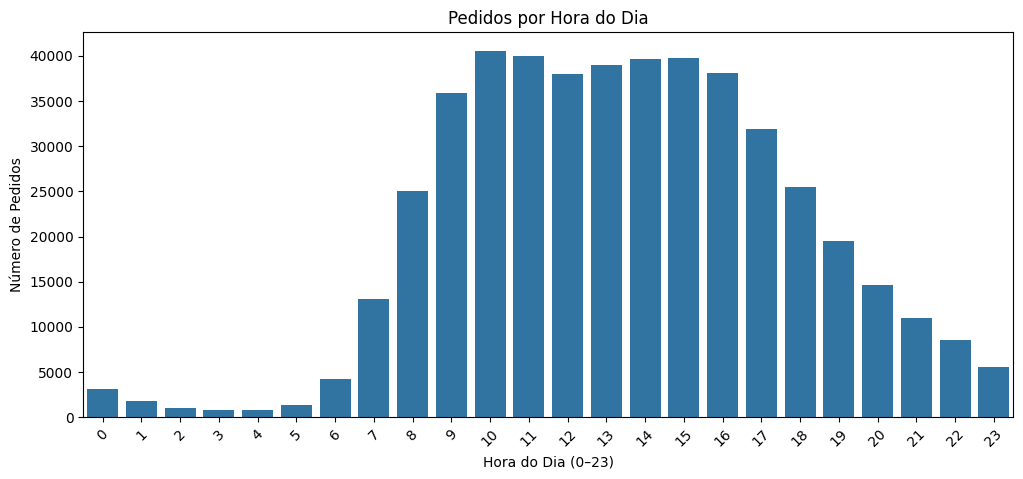

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.countplot(x='order_hour_of_day', data=df_inscart_orders)
plt.title('Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia (0‚Äì23)')
plt.ylabel('N√∫mero de Pedidos')
plt.xticks(rotation=45)
plt.show()


Escreva suas conclus√µes aqui

O pico comeca depois das 18 e vai caindo depois das 19.. 


### [A3] Em que dia da semana as pessoas compram produtos aliment√≠cios?

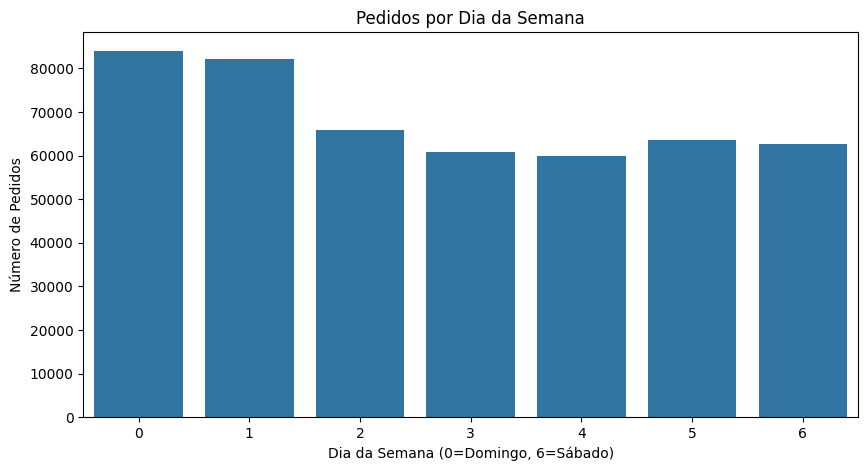

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='order_dow', data=df_inscart_orders)
plt.title('Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0=Domingo, 6=S√°bado)')
plt.ylabel('N√∫mero de Pedidos')
plt.show()


Escreva suas conclus√µes aqui

Domingo e segunda sao os melhors dias, porem nao sai muito da media.. 

### [A4] Quanto tempo as pessoas esperam at√© fazer outro pedido?

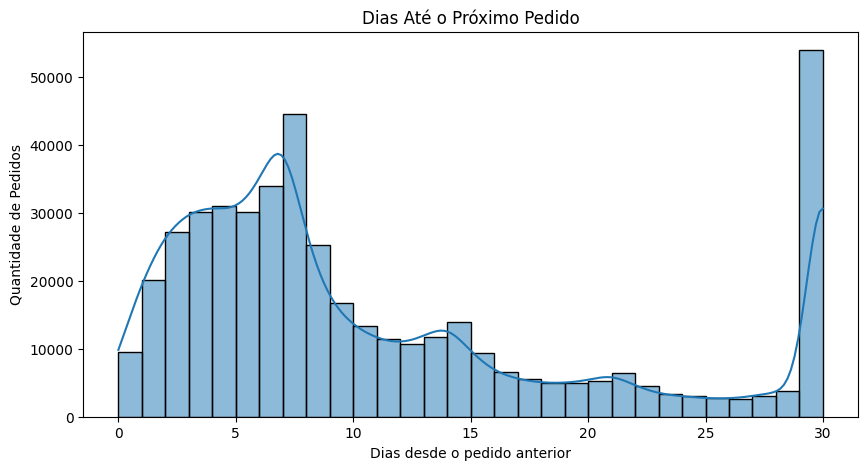

M√≠nimo: 0.0
M√°ximo: 30.0


In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(df_inscart_orders['days_since_prior_order'], bins=30, kde=True)
plt.title('Dias At√© o Pr√≥ximo Pedido')
plt.xlabel('Dias desde o pedido anterior')
plt.ylabel('Quantidade de Pedidos')
plt.show()

# Valores m√≠nimo e m√°ximo
print("M√≠nimo:", df_inscart_orders['days_since_prior_order'].min())
print("M√°ximo:", df_inscart_orders['days_since_prior_order'].max())

Escreva suas conclus√µes aqui

Depois do 10 dia apos a compra a recorrencia cai, porem temos pico de movimento nos primeiros 7 dias e ainda mais depois em 30 dias.. 

# [B] M√©dio (√© necess√°rio concluir tudo para passar)

1.	H√° alguma diferen√ßa nas distribui√ß√µes de `'order_hour_of_day'` nas quartas e s√°bados? Construa gr√°ficos de barras para ambos os dias no mesmo gr√°fico e descreva as diferen√ßas que voc√™ notou.
2.	Construa um gr√°fico de distribui√ß√£o para o n√∫mero de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais s√£o os 20 produtos comprados com mais frequ√™ncia? Exiba os IDs e nomes.


### [B1] Diferen√ßas nas quartas e s√°bados em `'order_hour_of_day'`. Crie gr√°ficos de barras para ambos os dias e descreva as diferen√ßas.

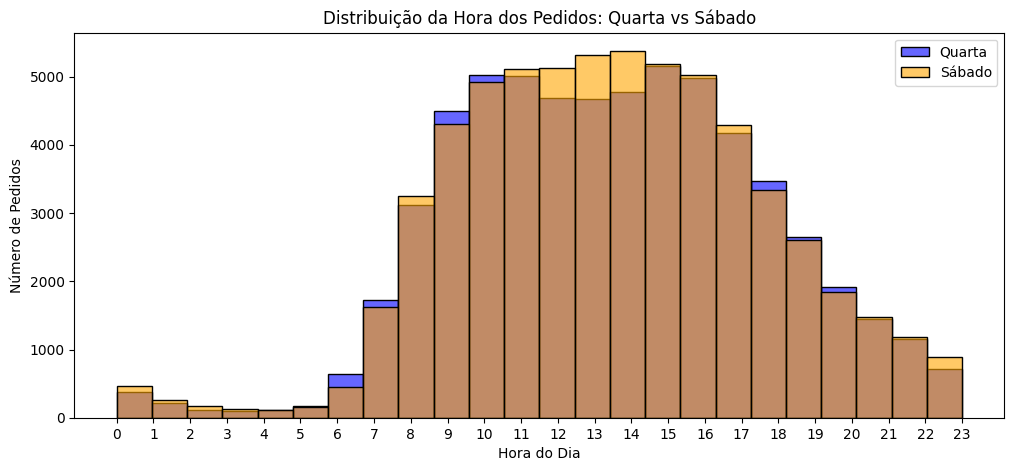

In [39]:
quartas_df_inscart_orders = df_inscart_orders[df_inscart_orders['order_dow'] == 3]
sabados_df_inscart_orders = df_inscart_orders[df_inscart_orders['order_dow'] == 6]


plt.figure(figsize=(12, 5))
sns.histplot(quartas_df_inscart_orders['order_hour_of_day'], bins=24, color='blue', label='Quarta', kde=False, stat='count', alpha=0.6)
sns.histplot(sabados_df_inscart_orders['order_hour_of_day'], bins=24, color='orange', label='S√°bado', kde=False, stat='count', alpha=0.6)
plt.title('Distribui√ß√£o da Hora dos Pedidos: Quarta vs S√°bado')
plt.xlabel('Hora do Dia')
plt.ylabel('N√∫mero de Pedidos')
plt.legend()
plt.xticks(range(0, 24))
plt.show()

Escreva suas conclus√µes aqui

pico semelhante de 10 e 14, ambos os dias de 0 as 7 o numero de pedidos e bem baixo. quarta tem um periodo mais estavel e de 17 a 19, sabado tem um pico maior de 13 as 14

### [B2] Qual √© a distribui√ß√£o do n√∫mero de pedidos por cliente?

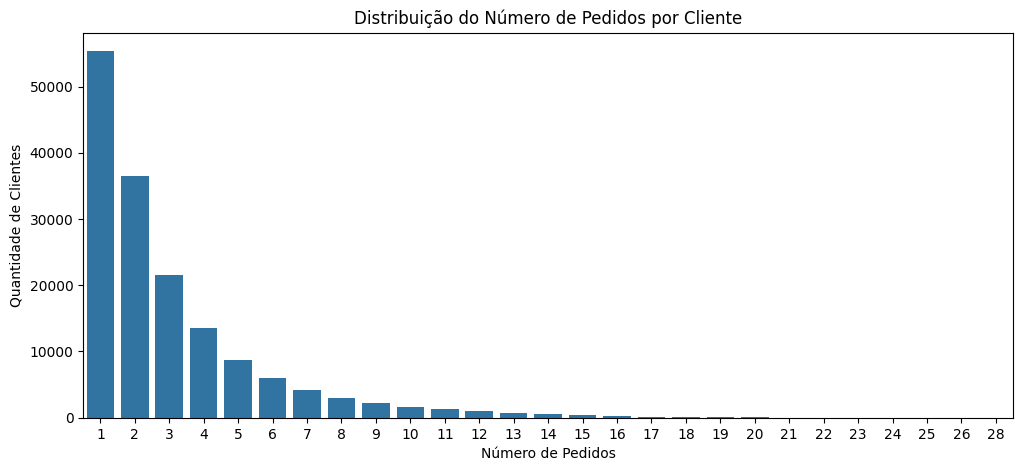

In [40]:
# Contar n√∫mero de pedidos por cliente
pedidos_por_usuario = df_inscart_orders['user_id'].value_counts()

# Contar quantos clientes fizeram 1 pedido, 2, 3, etc.
distribuicao = pedidos_por_usuario.value_counts().sort_index()

# Gr√°fico
plt.figure(figsize=(12, 5))
sns.barplot(x=distribuicao.index, y=distribuicao.values)
plt.title('Distribui√ß√£o do N√∫mero de Pedidos por Cliente')
plt.xlabel('N√∫mero de Pedidos')
plt.ylabel('Quantidade de Clientes')
plt.show()


Escreva suas conclus√µes aqui

A maioria dos clientes faz apenas 1 pedido. isso e mal!!! sinal que a loja tem pouca recorrencia. 

### [B3] Quais s√£o os 20 produtos mais populares? Exiba os IDs e nomes.

C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\2247420298.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


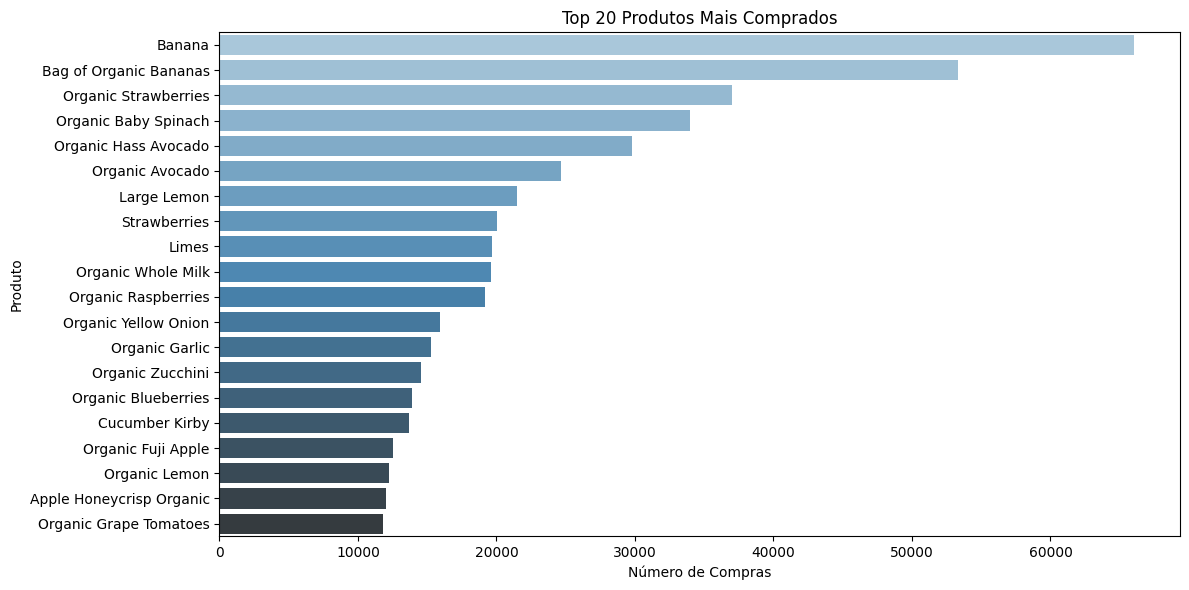

In [41]:
# 1. Contar quantas vezes cada produto foi comprado
vendas_por_produto = df_orders_products['product_id'].value_counts().reset_index()
vendas_por_produto.columns = ['product_id', 'total_compras']

# 2. Juntar com os nomes dos produtos (merge)
top_produtos = vendas_por_produto.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# 3. Pegar os 20 mais vendidos
top_20 = top_produtos.head(20)

# 4. Plotar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_compras',
    y='product_name',
    data=top_20,
    palette='Blues_d',
    hue=None
)
plt.title('Top 20 Produtos Mais Comprados')
plt.xlabel('N√∫mero de Compras')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


Escreva suas conclus√µes aqui

Banana √© o produto mais vendido disparado KKK , frutas e vegetais sao os mais populares. e padrao de consumidores buscando algo mais saudavel. 

# [C] Dif√≠cil (√© necess√°rio concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribui√ß√£o?
2.	Quais s√£o os 20 principais itens inclu√≠dos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos s√£o repetidos? Crie uma tabela com colunas de ID e nome do produto e a propor√ß√£o de pedidos repetidos.
4.	Para cada cliente, qual propor√ß√£o de todos os seus pedidos s√£o repetidos?
5.	Quais s√£o os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o n√∫mero de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribui√ß√£o?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


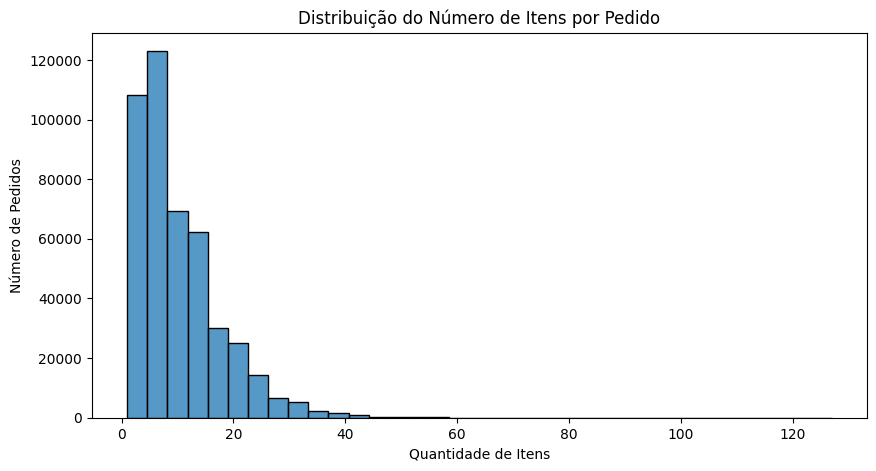

In [42]:
# Contar quantos produtos por pedido
itens_por_pedido = df_orders_products.groupby('order_id')['product_id'].count()


print(itens_por_pedido.describe())

plt.figure(figsize=(10, 5))
sns.histplot(itens_por_pedido, bins=35, kde=False)
plt.title('Distribui√ß√£o do N√∫mero de Itens por Pedido')
plt.xlabel('Quantidade de Itens')
plt.ylabel('N√∫mero de Pedidos')
plt.show()

Escreva suas conclus√µes aqui

Total de pedidos analisados: 450.046

M√©dia de itens por pedido: 10,1

Desvio padr√£o: 7,5 (alguma varia√ß√£o entre os pedidos)

M√≠nimo: 1 item

Mediana (50%): 8 itens

3¬∫ quartil (75%): 14 itens

M√°ximo: 127 itens em um √∫nico pedido

### [C2] Quais s√£o os 20 principais itens inclu√≠dos com mais frequ√™ncia em pedidos repetidos? Exiba os IDs e nomes.

    product_id              product_name  repeticoes
0        24852                    Banana       55763
1        13176    Bag of Organic Bananas       44450
2        21137      Organic Strawberries       28639
3        21903      Organic Baby Spinach       26233
4        47209      Organic Hass Avocado       23629
5        47766           Organic Avocado       18743
6        27845        Organic Whole Milk       16251
7        47626               Large Lemon       15044
8        27966       Organic Raspberries       14748
9        16797              Strawberries       13945
10       26209                     Limes       13327
11       22935      Organic Yellow Onion       11145
12       24964            Organic Garlic       10411
13       45007          Organic Zucchini       10076
14       49683            Cucumber Kirby        9538
15       28204        Organic Fuji Apple        8989
16        8277  Apple Honeycrisp Organic        8836
17       39275       Organic Blueberries      

C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\704395965.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


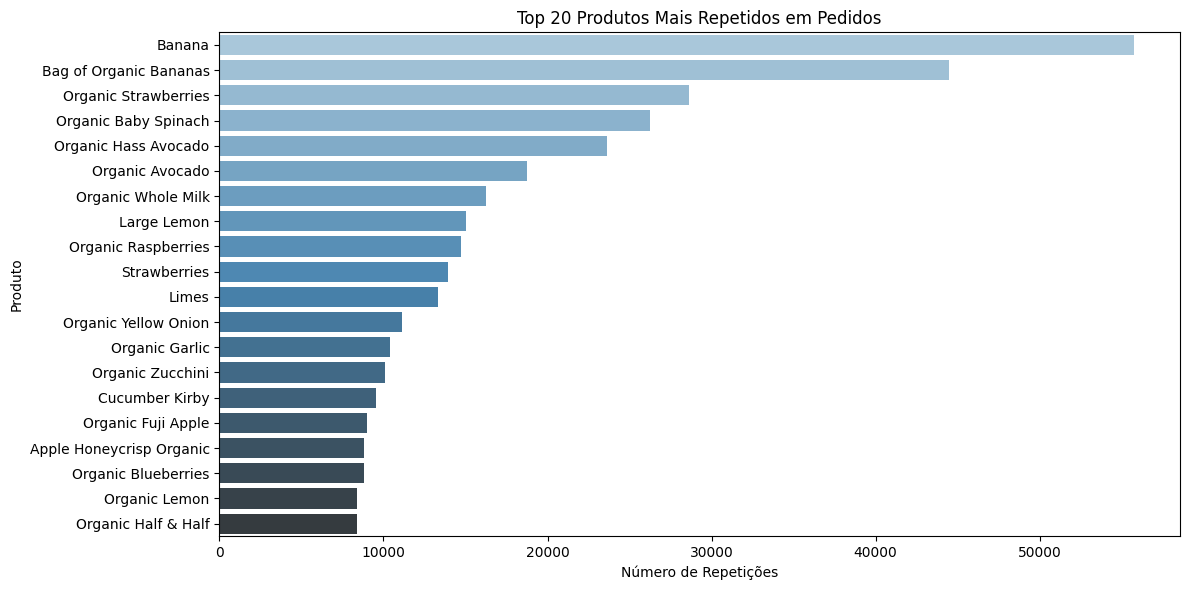

In [43]:
# Filtrar apenas os produtos que foram reorder == 1
repetidos = df_orders_products[df_orders_products['reordered'] == 1]

# Contar os mais frequentes
top_repetidos = repetidos['product_id'].value_counts().head(20).reset_index()
top_repetidos.columns = ['product_id', 'repeticoes']

# Juntar com nomes
top_repetidos = top_repetidos.merge(df_products[['product_id', 'product_name']], on='product_id')

print(top_repetidos[['product_id', 'product_name', 'repeticoes']])


plt.figure(figsize=(12, 6))
sns.barplot(
    x='repeticoes',
    y='product_name',
    data=top_repetidos,
    palette='Blues_d',
    hue=None
)
plt.title('Top 20 Produtos Mais Repetidos em Pedidos')
plt.xlabel('N√∫mero de Repeti√ß√µes')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

Escreva suas conclus√µes aqui

Banana, Morango org√¢nico e Espinafre. Esses itens aparecem direto nos pedidos repetidos, o que mostra que a galera realmente gosta e recompra com frequ√™ncia.

### [C3] Para cada produto, qual parcela de todos os pedidos dele s√£o repetidos?

   product_id  proporcao_repetida  \
0           1            0.564286   
1           2            0.000000   
2           3            0.738095   
3           4            0.510204   
4           7            0.500000   

                                        product_name  
0                         Chocolate Sandwich Cookies  
1                                   All-Seasons Salt  
2               Robust Golden Unsweetened Oolong Tea  
3  Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                     Pure Coconut Water With Orange  


C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\801928572.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


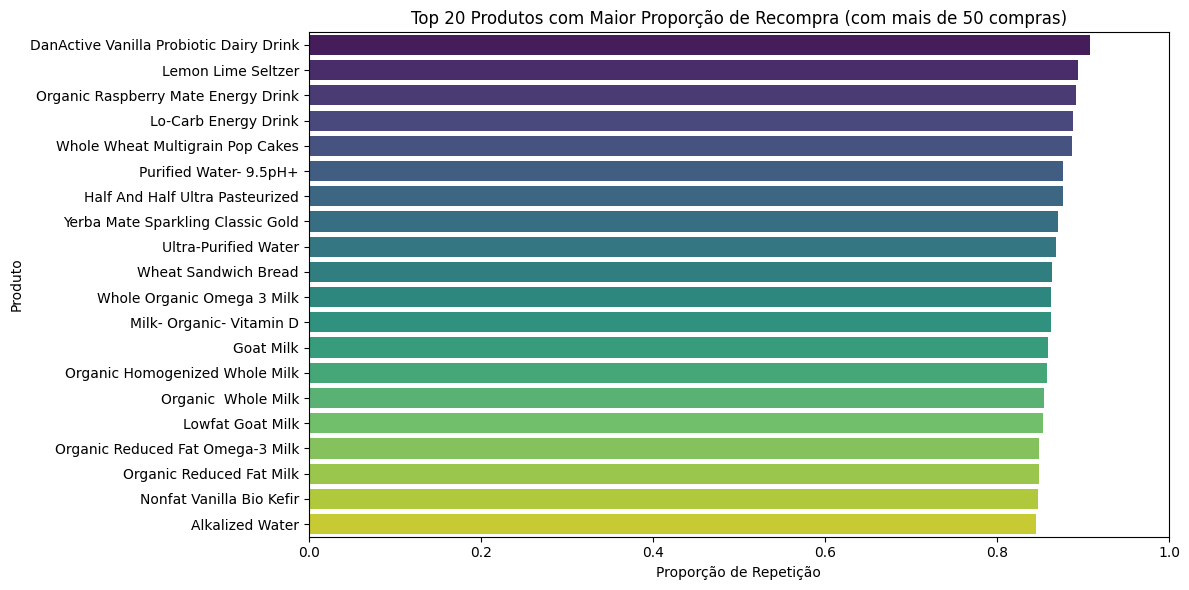

In [44]:

total_por_produto = df_orders_products.groupby('product_id')['reordered'].count()
repeticoes_por_produto = df_orders_products.groupby('product_id')['reordered'].sum()


proporcao = (repeticoes_por_produto / total_por_produto).reset_index()
proporcao.columns = ['product_id', 'proporcao_repetida']


proporcao = proporcao.merge(df_products[['product_id', 'product_name']], on='product_id')

print(proporcao.head())

# Selecionar os 20 
proporcao_filtrada = proporcao.merge(
    total_por_produto.reset_index(), on='product_id'
)
proporcao_filtrada = proporcao_filtrada[proporcao_filtrada['reordered'] >= 50]


top_recomprados = proporcao_filtrada.sort_values(by='proporcao_repetida', ascending=False).head(20)

# Gr√°fico
plt.figure(figsize=(12, 6))
sns.barplot(
    x='proporcao_repetida',
    y='product_name',
    data=top_recomprados,
    palette='viridis'
)
plt.title('Top 20 Produtos com Maior Propor√ß√£o de Recompra (com mais de 50 compras)')
plt.xlabel('Propor√ß√£o de Repeti√ß√£o')
plt.ylabel('Produto')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


bebidas estao no top, agua,leite, iorgute tem recompra boa , produto como organic whole milk, yerba mate sparkling tem otima regularidade tbm..

Escreva suas conclus√µes aqui

### [C4] Para cada cliente, qual propor√ß√£o de todos os seus pedidos s√£o repetidos?

   user_id  proporcao_repetida
0        2            0.038462
1        4            0.000000
2        5            0.666667
3        6            0.000000
4        7            0.928571


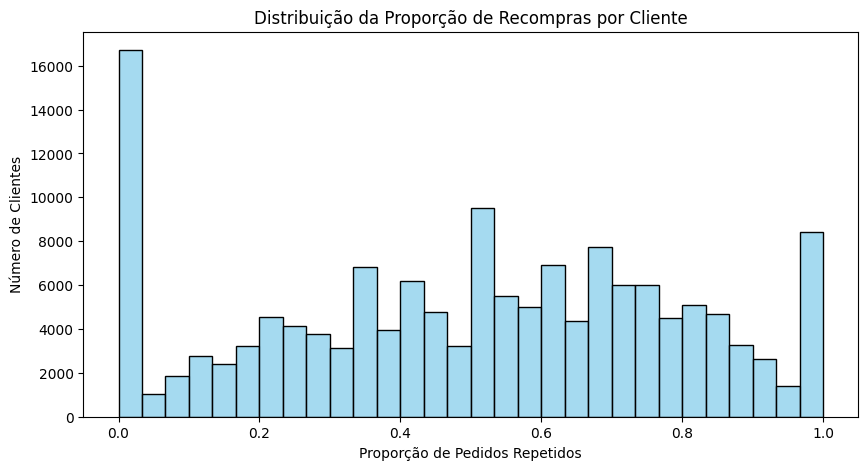

In [45]:
# Juntar pedidos com user_id
df = df_orders_products.merge(df_inscart_orders[['order_id', 'user_id']], on='order_id')

# Agrupar por cliente
total_por_cliente = df.groupby('user_id')['reordered'].count()
repeticoes_por_cliente = df.groupby('user_id')['reordered'].sum()

proporcao_clientes = (repeticoes_por_cliente / total_por_cliente).reset_index()
proporcao_clientes.columns = ['user_id', 'proporcao_repetida']

print(proporcao_clientes.head())

plt.figure(figsize=(10, 5))
sns.histplot(proporcao_clientes['proporcao_repetida'], bins=30, kde=False, color='skyblue')
plt.title('Distribui√ß√£o da Propor√ß√£o de Recompras por Cliente')
plt.xlabel('Propor√ß√£o de Pedidos Repetidos')
plt.ylabel('N√∫mero de Clientes')
plt.show()


tem um pessoal muito fiel, com propor√ß√£o de recompra de 1.0 e tem gente que nunca repete um produto. da pra investir tanto em novos produtos e tanto em manter o que ja estao sempre em mao

### [C5] Quais s√£o os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

    product_id                 product_name  vezes_como_primeiro
0        24852                       Banana                15562
1        13176       Bag of Organic Bananas                11026
2        27845           Organic Whole Milk                 4363
3        21137         Organic Strawberries                 3946
4        47209         Organic Hass Avocado                 3390
5        21903         Organic Baby Spinach                 3336
6        47766              Organic Avocado                 3044
7        19660                 Spring Water                 2336
8        16797                 Strawberries                 2308
9        27966          Organic Raspberries                 2024
10       44632   Sparkling Water Grapefruit                 1914
11       49235          Organic Half & Half                 1797
12       47626                  Large Lemon                 1737
13         196                         Soda                 1733
14       38689     Organi

C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\3022744113.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


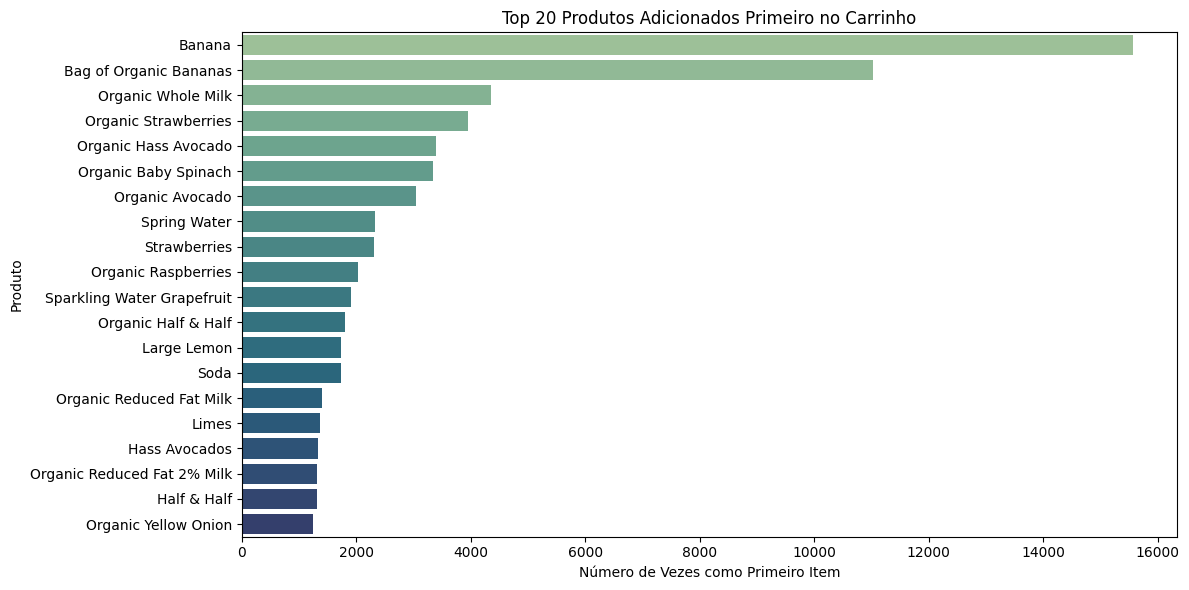

In [46]:
# Filtrar os produtos que foram o primeiro a entrar no carrinho
primeiros = df_orders_products[df_orders_products['add_to_cart_order'] == 1]

# Contar os mais comuns
top_primeiros = primeiros['product_id'].value_counts().head(20).reset_index()
top_primeiros.columns = ['product_id', 'vezes_como_primeiro']

# Juntar com nome
top_primeiros = top_primeiros.merge(df_products[['product_id', 'product_name']], on='product_id')

print(top_primeiros[['product_id', 'product_name', 'vezes_como_primeiro']])

plt.figure(figsize=(12, 6))
sns.barplot(
    x='vezes_como_primeiro',
    y='product_name',
    data=top_primeiros,
    palette='crest'
)
plt.title('Top 20 Produtos Adicionados Primeiro no Carrinho')
plt.xlabel('N√∫mero de Vezes como Primeiro Item')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


Banana seguindo forte em vendas. haha XD

Escreva suas conclus√µes aqui

# Conclus√£o geral do projeto:

Ao longo da an√°lise, foi poss√≠vel entender com mais profundidade o comportamento dos clientes da plataforma Instacart em rela√ß√£o √†s suas compras. Exploramos desde os produtos mais vendidos at√© os h√°bitos de recompra e as prefer√™ncias de ordem no carrinho. Com base nisso, tiramos alguns aprendizados importantes.

üîé Principais descobertas (pr√≥s):
Produtos frescos e org√¢nicos como banana, leite e morango lideram tanto em vendas quanto em recompra, o que mostra uma forte prefer√™ncia dos clientes por itens saud√°veis e b√°sicos.

Muitos clientes t√™m comportamento recorrente, com v√°rios apresentando alta propor√ß√£o de pedidos repetidos ‚Äî isso sugere fidelidade a certos produtos e abre espa√ßo para a√ß√µes de recomenda√ß√£o personalizada.

Os itens adicionados primeiro no carrinho tamb√©m tendem a ser os mais vendidos e mais repetidos, refor√ßando a ideia de que s√£o essenciais no dia a dia dos usu√°rios.

A base de dados, mesmo com valores ausentes e duplicados inclu√≠dos intencionalmente, permitiu observar padr√µes claros de comportamento.

‚ö†Ô∏è Limita√ß√µes e desafios (contras):
Alguns produtos com pouca quantidade de vendas apresentaram propor√ß√µes de recompra elevadas, o que pode distorcer a an√°lise se n√£o houver filtragem por volume m√≠nimo.

A aus√™ncia de informa√ß√µes como categoria de cliente, tempo entre pedidos ou valor da compra limitou a constru√ß√£o de perfis mais completos.

A presen√ßa de dados "missing" ou "unknown" (intencional) exigiu cuidados extras em cada etapa para evitar conclus√µes enviesadas.